# Shopify DataScience Intership Challenge

## Question 1: 
Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b. What metric would you report for this dataset?

c.What is its value?


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading file and preparing dataframe
cols = ['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items', 
        'payment_method', 'created_at']

df = pd.read_csv('./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', names=cols, na_values = "?",
                 comment = '\t', sep =",", skiprows = 1)

data = df.copy()
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Calculating the Average order value AOV = Total revenue / number of orders

In [3]:
total_amount = data['order_amount'].sum()
number_of_orders = len(data)
AOV = total_amount/number_of_orders
AOV

3145.128

The AOV = $3145.128 is very high.

To check the relevance of this result we can explore the distribution of the order_amount variable using a boxplot

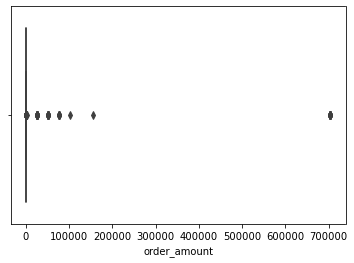

In [14]:
sns.boxplot(x=data['order_amount'])
plt.show()

Here we can see that the order_amount variable has many outliers, specially there are some values around the $700000 that very far away from the calculated first and second quartiles.

Without going further in the analysis of the data a better option to evaluate the data of order_amount could be using the median that is less sensible to outliers and gives a better and more useful understanding of the behaviour of order_amount variable.

In [6]:
data['order_amount'].median()

284.0

The result for the median for the order_amount variable is $284, this value is more reasonable than the AOV calculated before. The diference between this two values also gives an insight of how much the outliers affect the average meassured.

Going deeper on the data one can ask about the characteristics of the outliers to consider if they should be treated in a different way, perhaps there is some useful information to focus different merchadizing strategies for those cases.

An interesting variable could be the ammount of products ordered. A BoxPlot of the total_items variable would tell us about it.

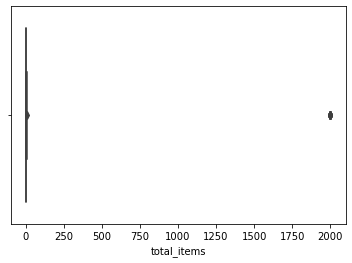

In [7]:
#What about number of items per order
sns.boxplot(x=data['total_items'])
plt.show()

Once again a very stong outlier ordering near 2000 shoes is found, lets exclude the values over 1000 ordered shoes just to understand the distribution of items ordered per order.

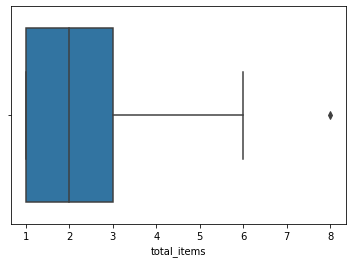

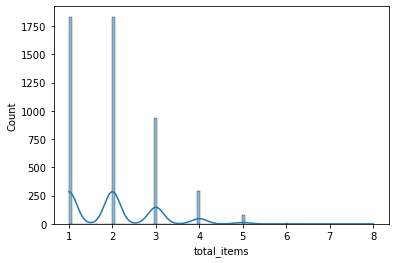

In [15]:
cut_value = 9
data2 = df[df['total_items'] < cut_value]
sns.boxplot(x=data2['total_items'])
plt.show()
sns.histplot(x=data2['total_items'], kde= True, bins=100)
plt.show()

In [ ]:
hist = data['order_amount'].hist(bins=150)

In [ ]:

sns.histplot(x=data['total_items'], kde= True, bins=50)
plt.show()

In [ ]:
cut_value = 9
data2 = df[df['total_items'] < cut_value]
sns.boxplot(x=data2['total_items'])
plt.show()
sns.histplot(x=data2['total_items'], kde= True, bins=100)
plt.show()
total_amount = data2['order_amount'].sum()
number_of_orders = len(data2)
AOV = total_amount/number_of_orders
print("For the cut value: " + str(cut_value) +", the AOV ="+ str(AOV))

In [ ]:
sns.boxplot(x=data2['order_amount'])
plt.show()
sns.histplot(x=data2['order_amount'], kde= True, bins=100)
plt.show()

In [ ]:
cut_value = 820
data3 = df[df['order_amount'] < cut_value]
sns.boxplot(x=data3['order_amount'])
plt.show()
sns.histplot(x=data3['order_amount'], kde= True, bins=100)
plt.show()
total_amount = data3['order_amount'].sum()
number_of_orders = len(data3)
AOV = total_amount/number_of_orders
print("For the cut value: " + str(cut_value) +", the AOV ="+ str(AOV))

In [ ]:
data['order_amount'].median()

# Final idea:
use the median and give a comment about the super outlier, he should be treated different.